# <center> Automatic Summarization of Scientific Papers

In [1]:
## Import all required libraries
import numpy as np 
import pandas as pd 
import json
import os
from tqdm import tqdm,tqdm_notebook
import gc
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

In [2]:
# Display the dataframe
df = pd.read_csv('scientific_papers_data.csv')
df = df.drop('Unnamed: 0',axis=1)
df

,paper_id,abstract,body_text
0,8187ea360c53a56ca2c579d758a5d6aa67716836,NaN,Research Letter to the Editor:We are writing t...
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,Background Brazil ranks second worldwide in to...,The COVID-19 pandemic has created an unprecede...
2,edb294108440787c9f074483fd3c953a83e53622,NaN,Die Corona-Pandemie ist eine Gefahr für die Ge...
3,ee5af71875f2e77135974c75980ce22fff03e4f8,NaN,"Particularly in these pandemic times, appeals ..."
4,a0bc6bc5b8547b98a2d77b81ca81cb18fa1b7ee9,NaN,"To the editor, We read with great interest the..."
...,...,...,...
995,49827c7799b4ae8e9c6bb3adef6b02ec8b94d92e,This paper presents a novel risk-based method ...,Cardiovascular disease accounts for near 18 mi...
996,bc6d1853198fd3acb2b1d2f21e20936b296d0adc,Background: Re-opening universities while cont...,"Despite the on-going COVID-19 epidemic, social..."
997,707b7cc515837773de5fc54f1a8fa333b8bddca9,The main intervention was maxillary advancemen...,"The lips, tongue, jaws, and velum work togethe..."
998,db0fe1faa83412d68be1dcc4ea012b5c497f7876,This is an open access article under the terms...,"In the last decade, interest in presenteeism h..."


In [3]:
# Describe the New processed Dataframe
df.describe()

,paper_id,abstract,body_text
count,1000,700,1000
unique,1000,698,1000
top,47c27fb203df73566fd5203f2f6ba40713167c36,Background,A number of infections of the central nervous ...
freq,1,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   paper_id   1000 non-null   object
 1   abstract   700 non-null    object
 2   body_text  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [5]:
# Drop null values in 'abstract' columns
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   paper_id   700 non-null    object
 1   abstract   700 non-null    object
 2   body_text  700 non-null    object
dtypes: object(3)
memory usage: 21.9+ KB


In [6]:
# Converting object column types into str type
df['abstract'] = df['abstract'].astype(str)
df['body_text'] = df['body_text'].astype(str)

# Data Preprocessing

## Word count

In [7]:
# Count of all tokens in the columns and unique words in the columns
df['abstract_word_count'] = df['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
df['body_word_count'] = df['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
df['body_unique_words']=df['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df.head()

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,Background Brazil ranks second worldwide in to...,The COVID-19 pandemic has created an unprecede...,372,4086,1298
6,89afc7a375be1b21ee163ab5877961e19a501638,Vaccine hesitancy could become a significant i...,The death toll of COVID-19 cases and failed pa...,250,3328,1094
7,6316b4bc0a8cf6564d0f5a2ea5de007179681777,The COVID-19 pandemic has spread globally for ...,"The Corona Virus Disease 2019 , pandemic is an...",221,3952,1271
8,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,Coronavirus disease 2019 is a global pandemic ...,Forces beyond your control can take away every...,208,2841,1110
10,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,The Asymptomatic novel CORonavirus iNfection (...,The World Health Organization first declared a...,261,1089,509


## Check for null values

In [8]:
# Check if NULL values are present in the dataset along with count of the NULL values
for col in df.columns:
    print(col, df[col].isnull().sum())

paper_id 0
abstract 0
body_text 0
abstract_word_count 0
body_word_count 0
body_unique_words 0


### Delete all rows for whose word count is 0

In [9]:
# Let’s delete all rows for whose word count is 0
df.drop(df.index[df['abstract_word_count'] == 0], inplace = True)
df.drop(df.index[df['body_word_count'] == 0], inplace = True)
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,Background Brazil ranks second worldwide in to...,The COVID-19 pandemic has created an unprecede...,372,4086,1298
6,89afc7a375be1b21ee163ab5877961e19a501638,Vaccine hesitancy could become a significant i...,The death toll of COVID-19 cases and failed pa...,250,3328,1094
7,6316b4bc0a8cf6564d0f5a2ea5de007179681777,The COVID-19 pandemic has spread globally for ...,"The Corona Virus Disease 2019 , pandemic is an...",221,3952,1271
8,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,Coronavirus disease 2019 is a global pandemic ...,Forces beyond your control can take away every...,208,2841,1110
10,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,The Asymptomatic novel CORonavirus iNfection (...,The World Health Organization first declared a...,261,1089,509
...,...,...,...,...,...,...
995,49827c7799b4ae8e9c6bb3adef6b02ec8b94d92e,This paper presents a novel risk-based method ...,Cardiovascular disease accounts for near 18 mi...,158,3546,1026
996,bc6d1853198fd3acb2b1d2f21e20936b296d0adc,Background: Re-opening universities while cont...,"Despite the on-going COVID-19 epidemic, social...",342,5248,1462
997,707b7cc515837773de5fc54f1a8fa333b8bddca9,The main intervention was maxillary advancemen...,"The lips, tongue, jaws, and velum work togethe...",143,3497,1224
998,db0fe1faa83412d68be1dcc4ea012b5c497f7876,This is an open access article under the terms...,"In the last decade, interest in presenteeism h...",326,2643,979


## Converting to Lower Case



We are converting all the strings to lower case because, when training the model, it should not treat the capitalized words and non-capitalized words differently which may decrease the accuracy of the model later. To treat them equal, we are converting all of the string to Lower case.

In [10]:
# Converting strings to Lower case
df["abstract"] = df["abstract"].str.lower() 
df["body_text"] = df["body_text"].str.lower() 
df.head(10)

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,background brazil ranks second worldwide in to...,the covid-19 pandemic has created an unprecede...,372,4086,1298
6,89afc7a375be1b21ee163ab5877961e19a501638,vaccine hesitancy could become a significant i...,the death toll of covid-19 cases and failed pa...,250,3328,1094
7,6316b4bc0a8cf6564d0f5a2ea5de007179681777,the covid-19 pandemic has spread globally for ...,"the corona virus disease 2019 , pandemic is an...",221,3952,1271
8,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 is a global pandemic ...,forces beyond your control can take away every...,208,2841,1110
10,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,the asymptomatic novel coronavirus infection (...,the world health organization first declared a...,261,1089,509
13,be9bdbb4987a83ad38fb0b65018528055e13eab7,aims/hypothesis transmembrane protein 27 (tmem...,type 2 diabetes is a complex disease that pres...,243,4445,1531
14,dc7683d6e5521d574246b74bdf325fc55d204f37,smart factories have already become a key them...,smart factory is already being distributed as ...,186,2715,970
16,443260ba29c6f8b6b33b0ebf9ac0a84e03b49be1,background: currently there is no effective pr...,methods: four hundred forty-nine melanoma case...,56,4302,1308
18,acfb6e59bf5f762b7a749c4bdc3613360fdc2160,the purpose of this study was to assess the pe...,in the midst of a global covid-19 pandemic (wo...,225,7146,2382
19,fcb1c4ac23381ffb7dbeaad05aa5307cf4386912,virus is known to resonate in the confined-aco...,"in the past few decades, tremendous efforts ha...",151,5438,1553


## Removing Stop Words



Stop words are a set of commonly used words in any language. For example, in English, “the”, “is” and “and”, would easily qualify as stop words. In NLP and text mining applications, stop words are used to eliminate unimportant words, allowing applications to focus on the important words instead.

The common language specific stop word list generally DOES NOT cover such domain specific terms. Similarly, for tweets, terms like “#” “RT”, “@username” can be potentially regarded as stop words.

In our dataset, we are dealing with research papers. So the words like 'doi', 'copyright','org', 'https', 'et', 'al', 'author', 'figure', 'rights', 'reserved', 'permission', 'fig', etc. are used more frequently which will not be considered as common stopwords in English. Hence we're customizing the stopwords list.

In [11]:
### load stopwords 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Reference : https://medium.com/analytics-vidhya/text-summarization-on-covid-19-research-data-a5ab28695e11

stopwords_custom = nltk.corpus.stopwords.words('english')
customize_stop_words = ['common','review','describes','abstract','retrospective','chart','patients','study','may',
                        'associated','results','including','high''found','one','well','among','Abstract','provide',
                        'objective','objective:','background','range','features','participates','doi', 'preprint', 
                        'copyright', 'org', 'https', 'et ','et' 'al', 'author', 'figure', 'table', 'rights', 'reserved', 
                        'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 'al.', 
                        'Elsevier', 'PMC', 'CZI']

### append custom stopwords to default stopwords from NLTK
for i in customize_stop_words:
    stopwords_custom.append(i)

In [13]:
df['abstract'] = df['abstract'].apply(lambda x: " ".join([word for word in x.split() if word not in (stopwords_custom)]))
df['body_text'] = df['body_text'].apply(lambda x: " ".join([word for word in x.split() if word not in (stopwords_custom)]))
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,brazil ranks second worldwide total number cov...,covid-19 pandemic created unprecedented worldw...,372,4086,1298
6,89afc7a375be1b21ee163ab5877961e19a501638,vaccine hesitancy could become significant imp...,death toll covid-19 cases failed pandemic prep...,250,3328,1094
7,6316b4bc0a8cf6564d0f5a2ea5de007179681777,covid-19 pandemic spread globally several mont...,"corona virus disease 2019 , pandemic ongoing p...",221,3952,1271
8,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 global pandemic affec...,forces beyond control take away everything pos...,208,2841,1110
10,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,asymptomatic novel coronavirus infection (acor...,world health organization first declared pande...,261,1089,509
...,...,...,...,...,...,...
995,49827c7799b4ae8e9c6bb3adef6b02ec8b94d92e,paper presents novel risk-based method automat...,cardiovascular disease accounts near 18 millio...,158,3546,1026
996,bc6d1853198fd3acb2b1d2f21e20936b296d0adc,background: re-opening universities controllin...,"despite on-going covid-19 epidemic, social dis...",342,5248,1462
997,707b7cc515837773de5fc54f1a8fa333b8bddca9,main intervention maxillary advancement lefort...,"lips, tongue, jaws, velum work together shape ...",143,3497,1224
998,db0fe1faa83412d68be1dcc4ea012b5c497f7876,open access article terms creative commons att...,"last decade, interest presenteeism grown devel...",326,2643,979


## Remove punctuation marks

In [14]:
from nltk.tokenize import RegexpTokenizer
tokenizer_pattern = RegexpTokenizer('\w+')
df['abstract'] = df['abstract'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
df['body_text'] = df['body_text'].apply(lambda x: " ".join(tokenizer_pattern.tokenize(x.lower())))
df

,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words
1,a0d063dca746b135afe0451ce0b3bb1e06cf15ae,brazil ranks second worldwide total number cov...,covid 19 pandemic created unprecedented worldw...,372,4086,1298
6,89afc7a375be1b21ee163ab5877961e19a501638,vaccine hesitancy could become significant imp...,death toll covid 19 cases failed pandemic prep...,250,3328,1094
7,6316b4bc0a8cf6564d0f5a2ea5de007179681777,covid 19 pandemic spread globally several mont...,corona virus disease 2019 pandemic ongoing pan...,221,3952,1271
8,6b9d9eb2e9f448a5d2b3646b37b16534211cb3ff,coronavirus disease 2019 global pandemic affec...,forces beyond control take away everything pos...,208,2841,1110
10,c79ce955bfc71ffe8159bca6bc81d783a86d8edf,asymptomatic novel coronavirus infection acorn...,world health organization first declared pande...,261,1089,509
...,...,...,...,...,...,...
995,49827c7799b4ae8e9c6bb3adef6b02ec8b94d92e,paper presents novel risk based method automat...,cardiovascular disease accounts near 18 millio...,158,3546,1026
996,bc6d1853198fd3acb2b1d2f21e20936b296d0adc,background re opening universities controlling...,despite on going covid 19 epidemic social dist...,342,5248,1462
997,707b7cc515837773de5fc54f1a8fa333b8bddca9,main intervention maxillary advancement lefort...,lips tongue jaws velum work together shape sou...,143,3497,1224
998,db0fe1faa83412d68be1dcc4ea012b5c497f7876,open access article terms creative commons att...,last decade interest presenteeism grown develo...,326,2643,979


# Data Visualization

## Word Cloud

Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

In [15]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

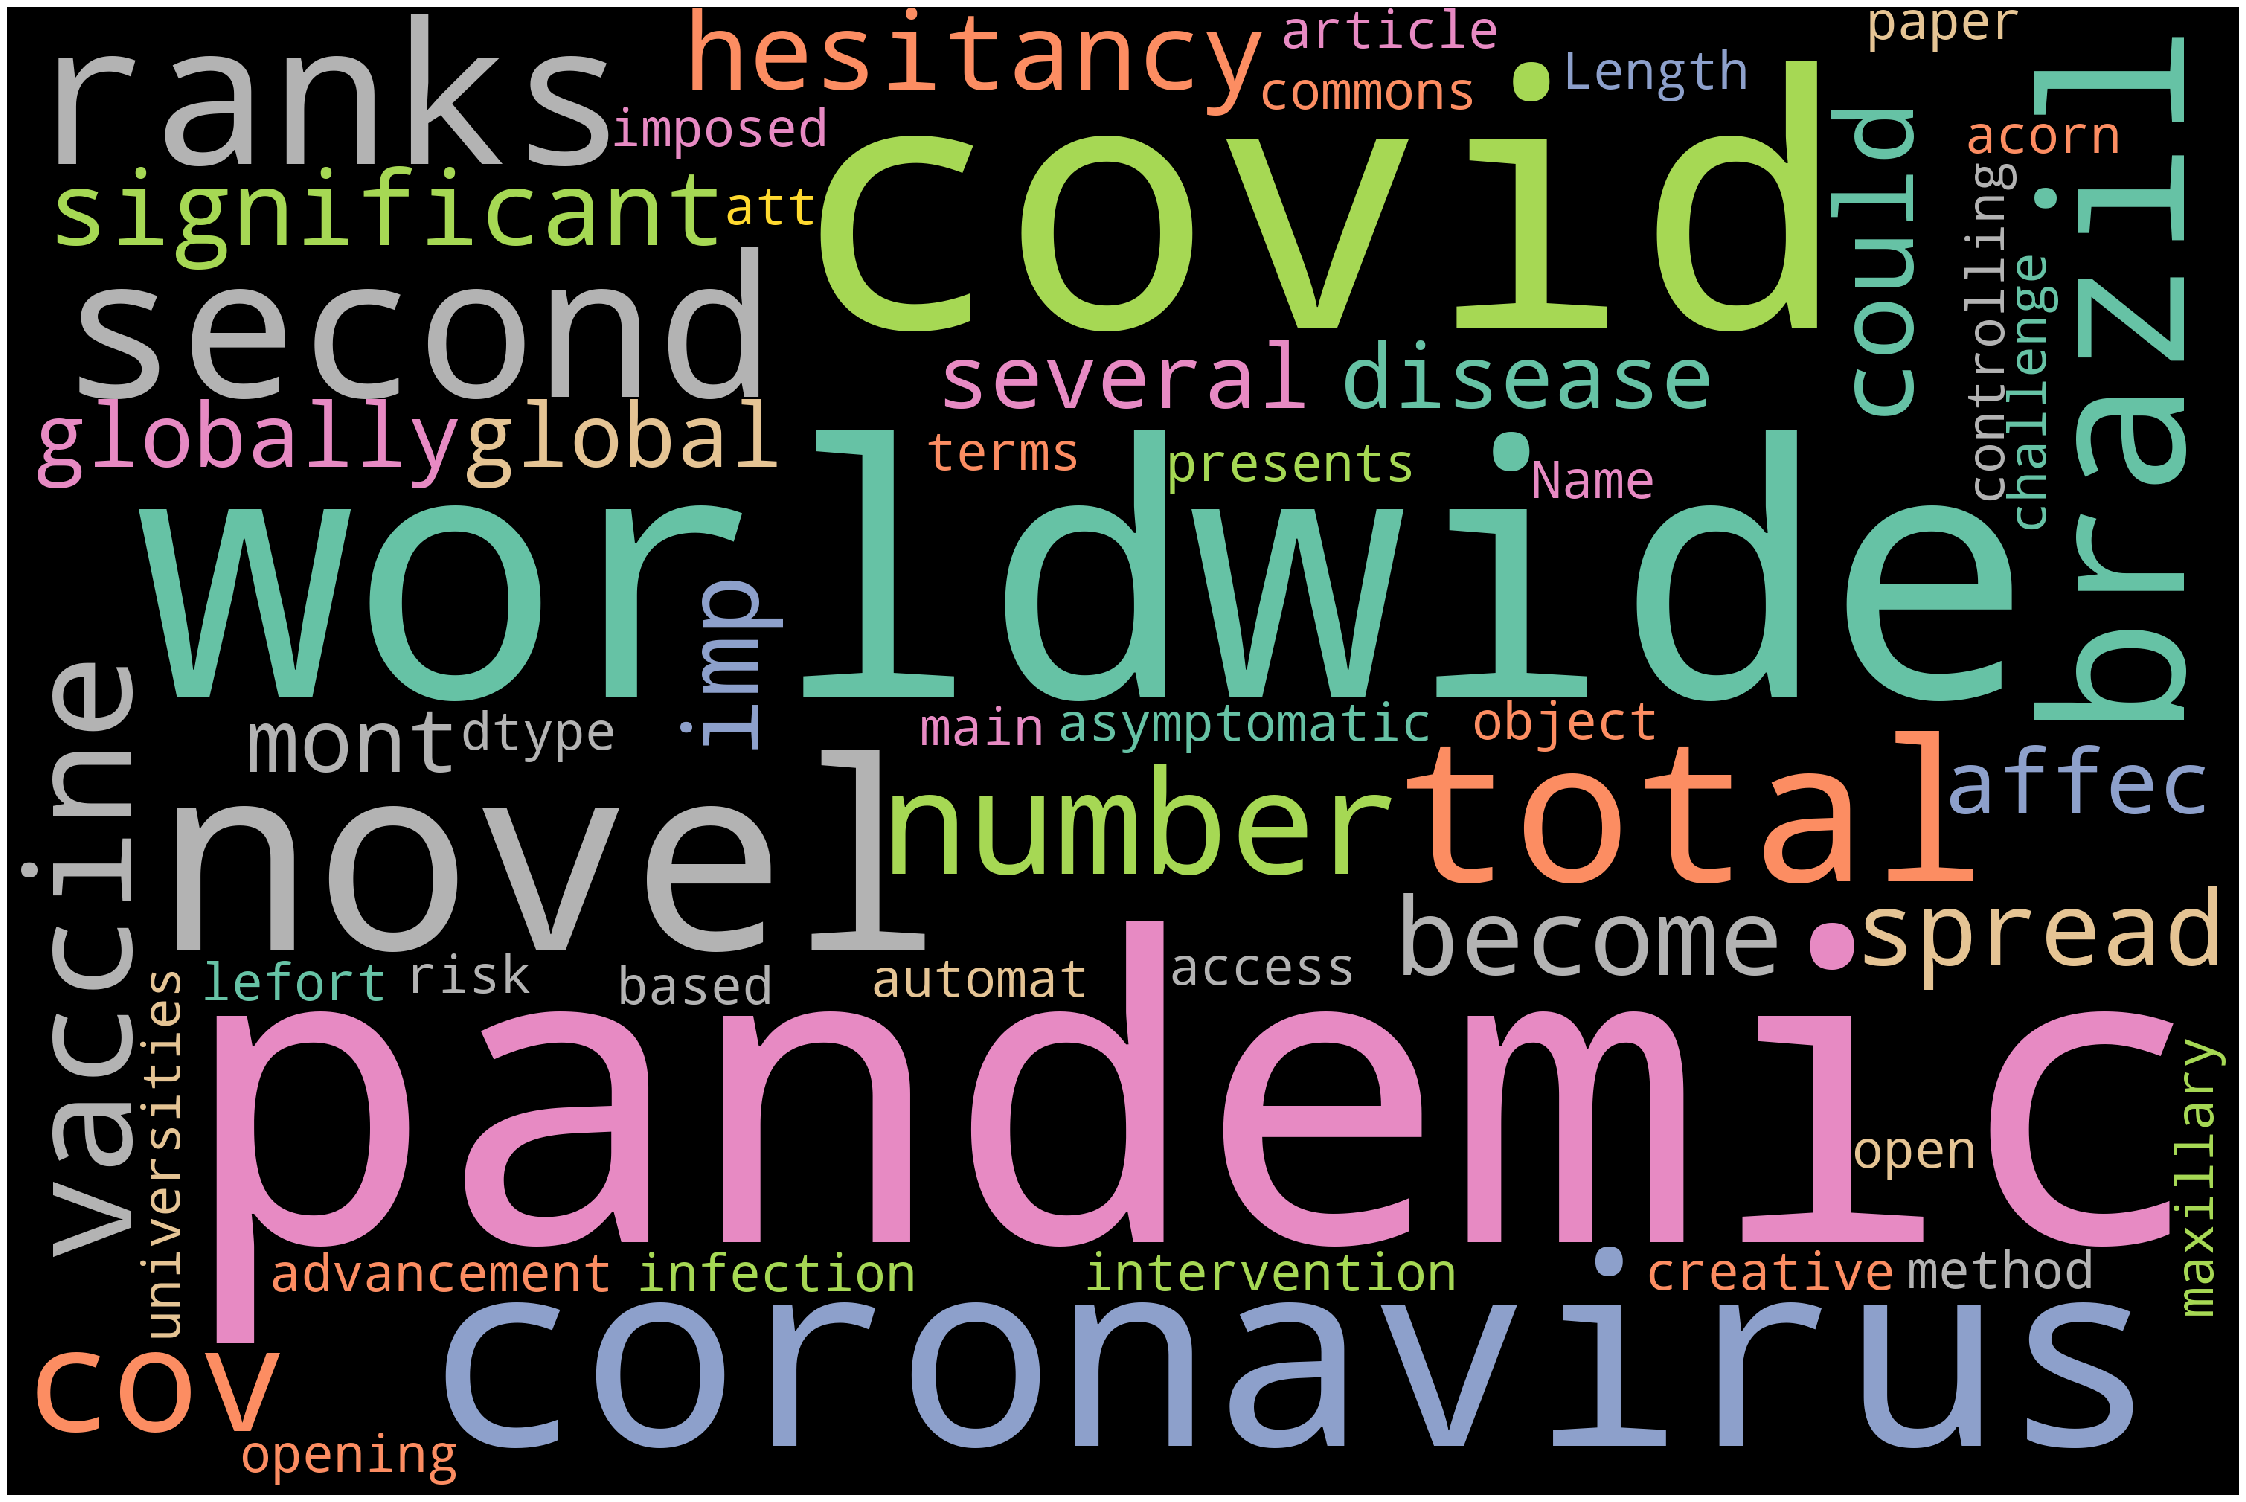

In [16]:
abstract_text = str(df.abstract)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords_custom).generate(abstract_text)
# Plot
plot_cloud(wordcloud)

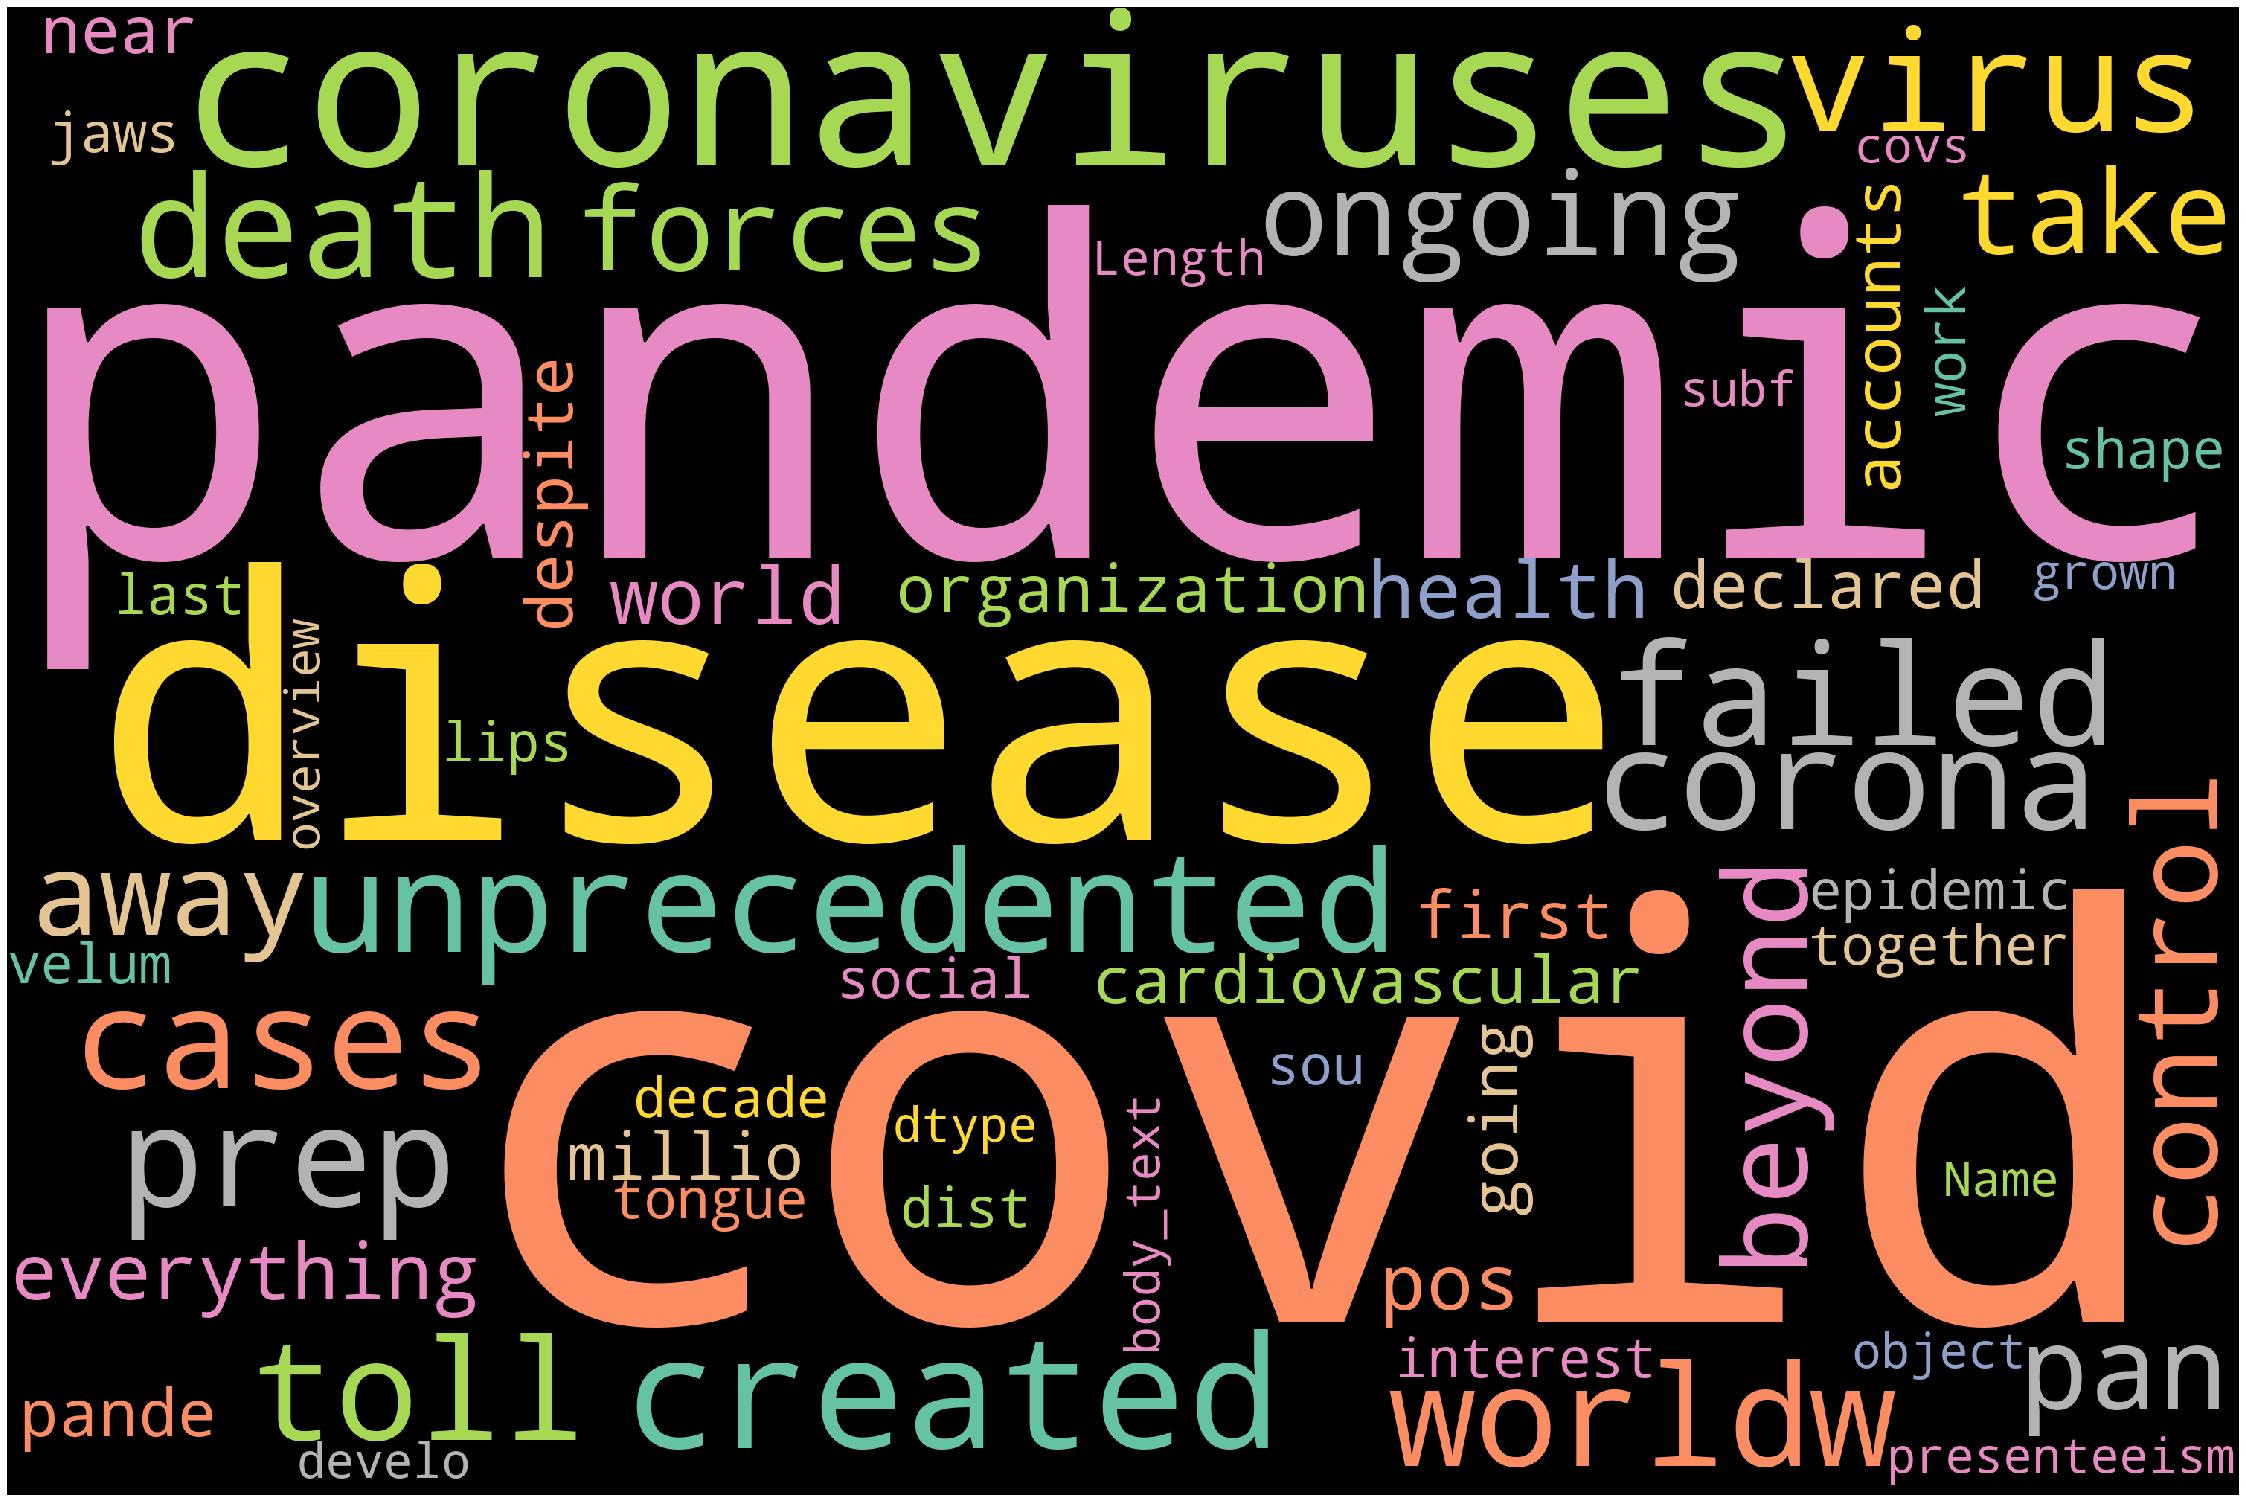

In [17]:
text = str(df.body_text)

# Import package
from wordcloud import WordCloud
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = stopwords_custom).generate(text)
# Plot
plot_cloud(wordcloud)

## Text Summarization of Papers

In [19]:
from transformers import pipeline
summarizer = pipeline("summarization")

All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


## Point to be noted:
- Now we can generate summary of any paper from the dataset, but we won't generate summary for all the papers in the dataset at once. Doing so will result in overload on cpu and runtime exceeding limit error.
- The Solution is to generate summary of a single paper(by defining its index location) once at a time.You can generate summary of any paper by giving its index location in the argument.

In [25]:
summary_text = summarizer(df['abstract'].iloc[2], max_length=200, min_length=30)
print(summary_text)

[{'summary_text': 'covid 19 pandemic spread globally several months transmissibility high pathogenicity seriously threaten people s lives crucial accurately quickly quickly detect covid19 infection many recent studies shown deep learning dl based solutions help detectcovid 19 based chest ct scans . new work focuses 2d datasets result low quality models real cc scans 3d images besides reported span broad spectrum .'}]
